In [84]:
import pandas as pd

raw_data = pd.read_csv("data/train.csv")
raw_data

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,Q020,Q021,Q022,Q023,Q024,Q025,ID,MF,NU_ANO,CONCEITO
0,3,F,1,1,1,2,2,1.0,0,4322707.0,...,A,A,E,A,B,B,2464336,608.46,2020,C
1,4,M,1,3,1,2,2,1.0,0,3303500.0,...,A,B,B,A,A,A,1983774,362.88,2020,E
2,3,M,1,3,1,2,2,1.0,0,2408102.0,...,A,A,E,A,B,B,1440554,681.82,2020,C
3,2,M,1,3,1,2,2,1.0,0,2306405.0,...,A,A,B,A,A,A,2522015,462.20,2020,E
4,3,F,1,1,1,2,2,1.0,0,3520509.0,...,A,A,D,A,A,B,3274277,506.72,2020,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207386,5,F,1,3,1,2,2,1.0,0,5201405.0,...,A,A,B,A,A,B,2195991,439.46,2020,E
207387,2,F,1,3,1,2,2,1.0,0,2313302.0,...,B,A,C,A,A,B,331822,625.36,2020,C
207388,3,F,1,1,1,2,3,1.0,0,3522703.0,...,A,B,E,B,D,B,1092831,680.02,2020,C
207389,2,F,1,1,1,2,3,1.0,0,4106902.0,...,A,B,C,A,C,B,3184302,785.96,2020,B


In [85]:
# Separa as colunas que são object
object_columns = raw_data.select_dtypes(include=['object']).columns
# display(raw_data[object_columns])

# Separando os dados de respostas e gabaritos
answers = raw_data[[col for col in object_columns if "TX" in col]]
data_to_encode = raw_data[[col for col in object_columns if "TX" not in col]]

data_to_encode.drop(["TP_SEXO", "NO_MUNICIPIO_ESC", "SG_UF_ESC", "SG_UF_PROVA", "NO_MUNICIPIO_PROVA"], inplace=True, axis=1)

data_to_encode

C:\Users\gugat\AppData\Local\Temp\ipykernel_14964\2901788149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_encode.drop(["TP_SEXO", "NO_MUNICIPIO_ESC", "SG_UF_ESC", "SG_UF_PROVA", "NO_MUNICIPIO_PROVA"], inplace=True, axis=1)


,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,CONCEITO
0,C,E,A,A,H,A,C,D,B,A,...,A,B,C,A,A,E,A,B,B,C
1,E,E,D,B,B,A,B,C,A,A,...,A,A,B,A,B,B,A,A,A,E
2,D,C,B,B,D,A,C,C,A,A,...,A,A,C,A,A,E,A,B,B,C
3,B,C,A,A,B,A,B,C,A,A,...,A,A,B,A,A,B,A,A,A,E
4,D,E,D,C,D,A,B,B,A,B,...,A,A,B,A,A,D,A,A,B,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207386,B,E,C,A,B,A,B,B,A,A,...,A,B,B,A,A,B,A,A,B,E
207387,C,F,D,D,C,A,B,C,A,A,...,A,A,B,B,A,C,A,A,B,C
207388,E,F,D,D,I,A,B,D,D,A,...,A,B,C,A,B,E,B,D,B,C
207389,G,G,E,D,Q,B,C,C,B,A,...,A,B,C,A,B,C,A,C,B,B


In [89]:
encoded_data = pd.get_dummies(data_to_encode)

encoded_data = pd.concat([encoded_data, raw_data.drop(object_columns, axis=1)], axis=1)
encoded_data.drop("ID", inplace=True, axis=1)

# Verifica valores nulos
encoded_data.isnull().sum()

Q001_A             0
Q001_B             0
Q001_C             0
Q001_D             0
Q001_E             0
                  ..
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
Q005               0
MF                 0
NU_ANO             0
Length: 167, dtype: int64

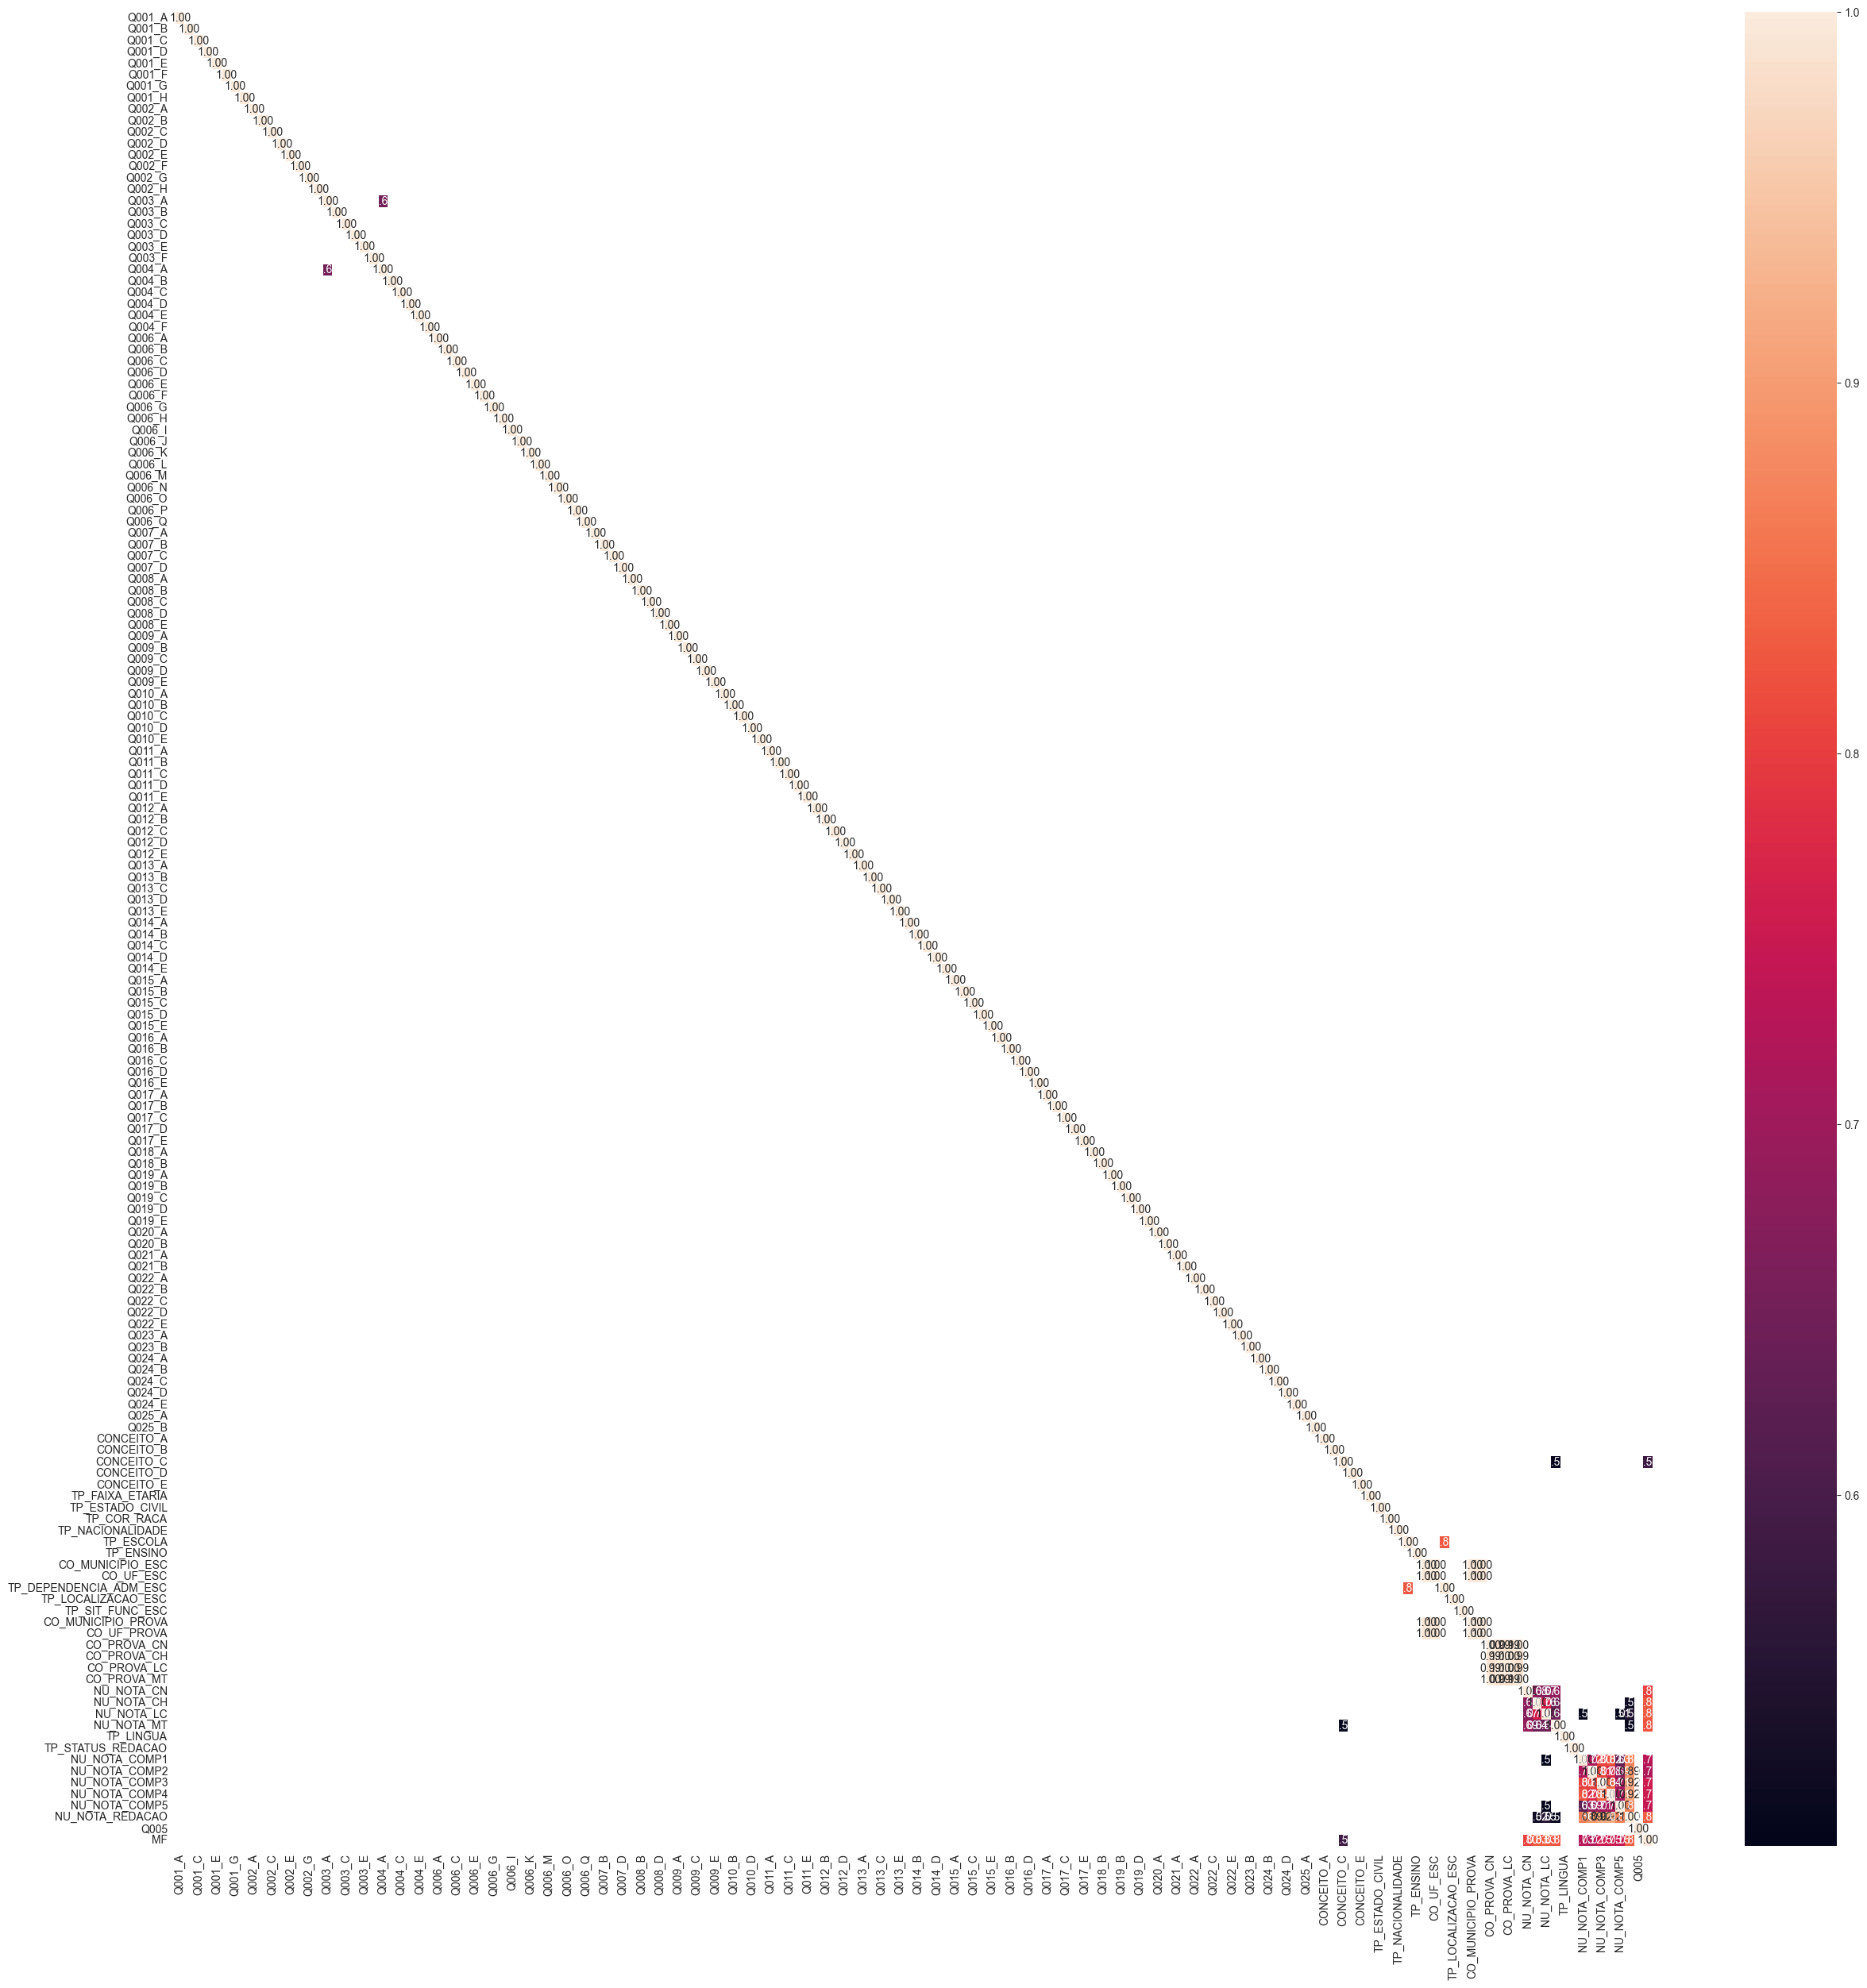

In [90]:
# Correlação entre as variáveis
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only the columns with correlation higher than 0.5
corr = encoded_data.corr()
corr = corr[corr > 0.5]
corr = corr.dropna(how='all', axis=0)
corr = corr.dropna(how='all', axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Filtrando as colunas com correlação maior que 0.5, percebemos que as notas das areas de conhecimento e a nota das areas de competencia estão altamente correlacionadas. Assim podemos dizer que os participantes não tem uma grande diferença de desenvolvimento entre as areas de conhecimento e as areas de competencia.

É possivel perceber que essas variáveis estão altamente correlacionadas com a nota da prova, o que é esperado, já que a nota da prova é a soma das notas das areas de conhecimento e das areas de competencia.

Sendo assim, podemos remover as colunas de areas de conhecimento e de areas de competencia, já que elas não agregam muito valor para o modelo, uma vez que só vamos ter esses dados depois que o participante já fez a prova. Então vamos fazer um modelo que preve a media final e o conceito com os dados socioeconômicos e alguns dados do participante, como:
    Situação de conclusão do Ensino Médio (TP_ST_CONCLUSAO)
    Tipo de escola do Ensino Médio (TP_ESCOLA)
    Tipo de instituição que concluiu ou concluirá o Ensino Médio (TP_ENSINO)

In [92]:
# Colunas de dados socioeconômicos
socioeconomic_columns = [col for col in encoded_data.columns if "Q0" in col]

# Colunas de dados do participante
participant_columns = [
    "TP_ST_CONCLUSAO",
    "TP_ESCOLA",
    "TP_ENSINO"
]

# Dataframe com as colunas de dados socioeconômicos e dados do participante
features = encoded_data[socioeconomic_columns + participant_columns]
target = raw_data["CONCEITO"]

features

,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,...,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q005,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,4.0,2,2,1.0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,2.0,2,2,1.0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,4.0,2,2,1.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3.0,2,2,1.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3.0,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207386,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,2,2,1.0
207387,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.0,2,2,1.0
207388,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,5.0,2,3,1.0
207389,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,2.0,2,3,1.0


In [93]:
# Separa os dados em treino e teste
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [94]:
# Treina o modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

RandomForestClassifier(random_state=42)

In [95]:
# Avalia o modelo
model.score(features_test, target_test)

0.49101955206248943

In [96]:
import numpy as np

# Vendo a importância das features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), features.columns[indices[f]])

Feature ranking:
1. feature 124 (0.058515) Q005
2. feature 126 (0.023067) TP_ESCOLA
3. feature 117 (0.019525) Q024_A
4. feature 113 (0.018692) Q022_D
5. feature 56 (0.017729) Q009_C
6. feature 57 (0.017475) Q009_D
7. feature 12 (0.016580) Q002_E
8. feature 4 (0.016433) Q001_E
9. feature 114 (0.015100) Q022_E
10. feature 102 (0.015038) Q019_B
11. feature 64 (0.014913) Q011_A
12. feature 50 (0.014628) Q008_B
13. feature 59 (0.014540) Q010_A
14. feature 112 (0.014476) Q022_C
15. feature 103 (0.014467) Q019_C
16. feature 65 (0.014236) Q011_B
17. feature 107 (0.014170) Q020_B
18. feature 106 (0.014166) Q020_A
19. feature 23 (0.014111) Q004_B
20. feature 60 (0.013852) Q010_B
21. feature 109 (0.013514) Q021_B
22. feature 90 (0.013464) Q016_B
23. feature 18 (0.013116) Q003_C
24. feature 89 (0.013104) Q016_A
25. feature 108 (0.012985) Q021_A
26. feature 25 (0.012662) Q004_D
27. feature 51 (0.012424) Q008_C
28. feature 19 (0.012326) Q003_D
29. feature 17 (0.012224) Q003_B
30. feature 116 (0.0120

Podemos ver que as features com maior importancia são:
    Q006 - Renda familiar
    Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
    Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência?
    Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?
    Q003 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).







In [62]:
encoded_data.query("CONCEITO == 1 or CONCEITO == 2")

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,Q020,Q021,Q022,Q023,Q024,Q025,ID,MF,NU_ANO,CONCEITO
0,3,0,1,1,1,2,2,1.0,0,4322707.0,...,0,0,4,0,1,1,2464336,608.46,2020,2
2,3,1,1,3,1,2,2,1.0,0,2408102.0,...,0,0,4,0,1,1,1440554,681.82,2020,2
10,2,1,1,1,1,2,2,1.0,0,3167202.0,...,0,0,2,0,1,1,461190,617.72,2020,2
11,3,1,1,1,1,2,3,1.0,0,3110905.0,...,1,0,2,0,1,1,1185270,690.34,2020,2
17,2,0,1,1,1,2,2,1.0,0,4108304.0,...,1,0,4,1,3,1,347228,645.26,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207377,4,0,1,1,1,2,2,1.0,0,3304557.0,...,0,1,3,0,1,1,1991073,709.10,2020,1
207378,3,0,1,1,1,2,3,1.0,0,5208707.0,...,0,0,3,1,2,1,160485,627.46,2020,2
207387,2,0,1,3,1,2,2,1.0,0,2313302.0,...,1,0,2,0,0,1,331822,625.36,2020,2
207388,3,0,1,1,1,2,3,1.0,0,3522703.0,...,0,1,4,1,3,1,1092831,680.02,2020,2
